# Framework para análise de dados
Em 10 passos

### Passo 0 - A base de dados
Nesse caso, usou-se uma base de dados do titanic

In [19]:
import seaborn as sns

titanic_df = sns.load_dataset('titanic')
print(titanic_df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


### Passo 1 - Sumarização
Para ter uma visão geral do dataset

In [20]:
titanic_df.describe(include = 'all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Passo 2 - Tipos de dados
Avaliar os tipos de dados de cada coluna

In [21]:
print(titanic_df.dtypes)

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


### Passo 3 - Valores ausentes
Verifica-se quais valores estão ausentes para posterior tratamento

In [22]:
print(titanic_df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Passo 4 - Tratamento de valores ausentes
Preenche-se os valores ausentes, a princípio (não são os melhores métodos), preenche-se os numéricos ausentes com a média e os categóricos ausentes com a moda

In [25]:
## filling nulls with mean 
titanic_df['age'] = titanic_df['age'].fillna(titanic_df['age'].mean())

## filling nulls with mode 
embarked_mode = titanic_df['embarked'].mode()
titanic_df['embarked'] = titanic_df['embarked'].fillna(embarked_mode[0])

## count of nulls
print(titanic_df.isnull().sum())

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Passo 5 - Identificação de outliers
Plota-se um histograma para tanto

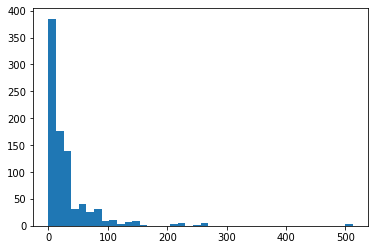

In [27]:
import matplotlib.pyplot as plt
plt.hist(titanic_df['fare'],bins = 40)
plt.show()

### Passo 6 - Tratamento de outliers
Substitui-se os valores de 'fare' por alguns dentro de uma faixa mais lógica (também não é o melhor método)

In [29]:
print(titanic_df.loc[titanic_df['fare'] < 300,'fare'].max())
## 263

# capping the fare to 263
titanic_df.loc[titanic_df['fare'] > 300,'fare'] = 263

263.0


### Passo 7 - Tratamento por categoria
Verifica-se se há mais chance de sobreviver para algumas classes

In [33]:
## Gender 
import plotly.express as px

fig = px.bar(titanic_df, x='survived', y='sex', color='sex', barmode='group')
fig.show()

### Passo 8 - Analise temporal
Impossível com essa base, mas tudo bem

### Passo 9 - Anális de lugar

### Passo 10 - Perguntas do tipo "O que?" ou "Qual/quais?"